In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions




In [2]:
train_data_dir = 'images/Augmentation/train'  # Path to training data
test_data_dir = 'images/Augmentation/test/'  # Path to testing data

# Image dimensions (VGGNet input size)
img_width, img_height = 128, 128

# Function to load images and labels
def load_data(data_dir):
    images = []
    labels = []
    label_encoder = LabelEncoder()

    emotions = os.listdir(data_dir)
    label_encoder.fit(emotions)  # Fit LabelEncoder directly on emotions

    for emotion in emotions:
        label_name = emotion  # Extracting label name from folder name
        label = label_encoder.transform([label_name])[0]  # Transform label to encoded integer
        for img_file in os.listdir(os.path.join(data_dir, emotion)):
            img_path = os.path.join(data_dir, emotion, img_file)
            img = cv2.imread(img_path)
            img = img.astype('float32') / 255.0  # Normalize pixel values
            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)


# Load training and testing data
X_train, y_train = load_data(train_data_dir)
X_test, y_test = load_data(test_data_dir)



In [3]:
print(f"Image shape: {X_train.shape}")  # This line will print the shape of the image


Image shape: (2912, 128, 128, 3)


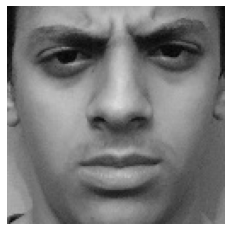

In [4]:
plt.imshow(X_train[0])
plt.axis('off')  # Hide axis labels
plt.show()

In [5]:
# Use one-hot encoding for the labels
num_classes = len(np.unique(y_train))
y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



In [6]:
# Load pre-trained VGG16 model (without the top layer)
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the convolutional layers
for layer in vgg_model.layers:
    layer.trainable = False

# Create a new model
model = Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 10

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_val, y_val))


Epoch 1/10
73/73 [==============================] - 69s 933ms/step - loss: 1.1659 - accuracy: 0.6668 - val_loss: 0.1778 - val_accuracy: 0.9931
Epoch 2/10
73/73 [==============================] - 127s 2s/step - loss: 0.1366 - accuracy: 0.9824 - val_loss: 0.0277 - val_accuracy: 1.0000
Epoch 3/10
73/73 [==============================] - 127s 2s/step - loss: 0.0387 - accuracy: 0.9987 - val_loss: 0.0123 - val_accuracy: 1.0000
Epoch 4/10
23/73 [========>.....................] - ETA: 1:14 - loss: 0.0251 - accuracy: 1.0000

KeyboardInterrupt: 

19/19 [==============================] - 14s 723ms/step


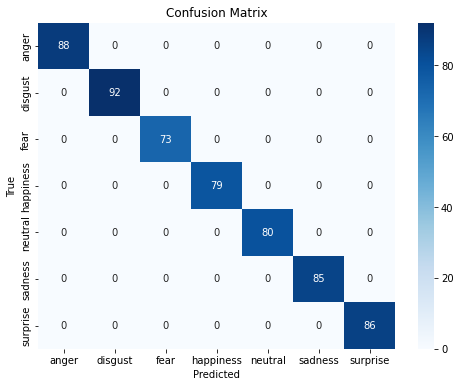

In [28]:
import seaborn as sns
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Define class labels
class_names = ['anger', 'disgust',  'fear', 'happiness', 'neutral', 'sadness', 'surprise']  # Replace with class names

# Plot confusion matrix
def plot_cm(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Usage example:
plot_cm(y_true_classes, y_pred_classes, class_names)

In [29]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

35/35 [==============================] - 27s 768ms/step - loss: 4.1418 - accuracy: 0.3000
Test Accuracy: 30.00%


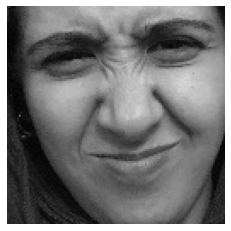

In [68]:

import matplotlib.pyplot as plt
import cv2

# Path to the image
image_path = 'images/detected faces/validation detected faces for each emotion/preprocessed/anger/854459.jpg_face.jpg'

img = cv2.imread(image_path)
img = img.astype('float32') / 255.0  # Normalize pixel values

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Hide axis labels
plt.show()



In [71]:
import cv2
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input

# Path to the image
image_path = 'images/detected faces/validation detected faces for each emotion/surprise/844819.jpg_face.jpg'
# Read the image using OpenCV
img = cv2.imread(image_path)

# Preprocess the image
img = cv2.resize(img, (128, 128))  # Resize the image to match VGG16 input size
img = img.astype('float32') / 255.0  # Normalize pixel values
img = np.expand_dims(img, axis=0)  # Add batch dimension

# Make predictions using the loaded model
predictions = model.predict(img)

# Interpret the predictions (for example, get the class with the highest probability)
predicted_class = np.argmax(predictions, axis=1)

# Display the predicted class
print(f"The predicted class for the image is: {predicted_class}")


1/1 [==============================] - 0s 65ms/step
The predicted class for the image is: [6]
